<a href="https://colab.research.google.com/github/yash-02/Recommendation-system/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/krishnaik06/Recommendation_complete_tutorial/master/KNN%20Movie%20Recommendation/movies.csv

--2022-07-15 05:55:59--  https://raw.githubusercontent.com/krishnaik06/Recommendation_complete_tutorial/master/KNN%20Movie%20Recommendation/movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494431 (483K) [text/plain]
Saving to: ‘movies.csv’

movies.csv          100%[===================>] 482.84K  --.-KB/s    in 0.02s   

2022-07-15 05:55:59 (19.0 MB/s) - ‘movies.csv’ saved [494431/494431]



In [2]:
!wget https://raw.githubusercontent.com/krishnaik06/Recommendation_complete_tutorial/master/KNN%20Movie%20Recommendation/ratings.csv

--2022-07-15 05:55:59--  https://raw.githubusercontent.com/krishnaik06/Recommendation_complete_tutorial/master/KNN%20Movie%20Recommendation/ratings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2483723 (2.4M) [text/plain]
Saving to: ‘ratings.csv’

ratings.csv         100%[===================>]   2.37M  --.-KB/s    in 0.04s   

2022-07-15 05:56:00 (58.6 MB/s) - ‘ratings.csv’ saved [2483723/2483723]



### dependency 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix 
from sklearn.neighbors import NearestNeighbors


### Reading data

In [8]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
movies_df

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [30]:
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [31]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [32]:
df.shape

(100836, 4)

In [48]:
df.tail()

,userId,movieId,rating,title
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)
100835,610,163981,3.5,31 (2016)


In [49]:
df.title.value_counts().count()

9719

In [60]:
df["movies_name"]  = df['title'].apply(lambda m:''.join(m.split()))
df["movies_name"]  

0                       ToyStory(1995)
1                       ToyStory(1995)
2                       ToyStory(1995)
3                       ToyStory(1995)
4                       ToyStory(1995)
                      ...             
100831                 Bloodmoon(1997)
100832    SympathyfortheUnderdog(1971)
100833                    Hazard(2005)
100834                BlairWitch(2016)
100835                        31(2016)
Name: movies_name, Length: 100836, dtype: object

In [ ]:
list_movies = [''.join(m.split()) for m in df["movies_name"]]
list_movies

### Top movies

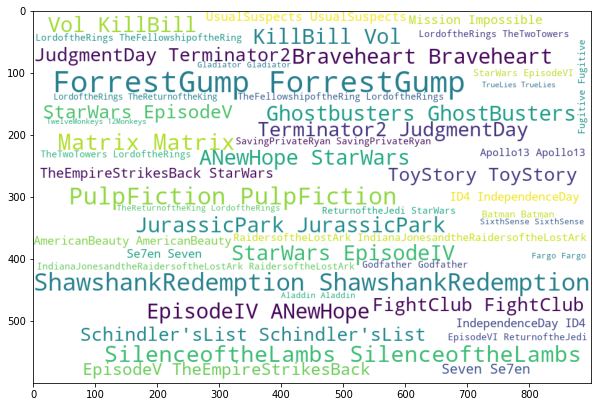

In [65]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize= (10,16))

stopwords = set(STOPWORDS)
word_cloud = WordCloud( 
                        max_words=50,
                       height= 600,
                       width= 900,
                        stopwords = stopwords,
                       background_color='white')
word_cloud = word_cloud.generate(str(list_movies))
plt.imshow(word_cloud)


In [66]:
df['title'].value_counts(sort=True,ascending=False)[:20] 

Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                      

### Perpressing

In [ ]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
print(movie_ratingCount.shape)
movie_ratingCount.head()

(9719, 2)


,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
rating_50 = movie_ratingCount[movie_ratingCount["totalRatingCount"]>50]
rating_50

,title,totalRatingCount
18,10 Things I Hate About You (1999),54
34,12 Angry Men (1957),57
74,2001: A Space Odyssey (1968),109
89,28 Days Later (2002),58
104,300 (2007),80
...,...,...
9620,X-Men: The Last Stand (2006),52
9621,X2: X-Men United (2003),76
9656,Young Frankenstein (1974),69
9699,Zombieland (2009),53


In [ ]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215
...,...,...,...,...,...
100831,610,160341,2.500,Bloodmoon (1997),1
100832,610,160527,4.500,Sympathy for the Underdog (1971),1
100833,610,160836,3.000,Hazard (2005),1
100834,610,163937,3.500,Blair Witch (2016),1


In [ ]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [ ]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,570,571,572,573,574,575,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,3.000,3.000,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,5.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,2.000,3.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,...,0.000,0.000,5.000,0.000,0.000,0.000,3.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,5.000,4.000,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,0.000,1.500,0.000,0.000,0.000,0.000,0.000,3.000,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,0.000,3.500,0.000,0.000,4.000,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [ ]:
print(csr_matrix(movie_features_df.values))

  (0, 11)	5.0
  (0, 18)	3.0
  (0, 66)	4.5
  (0, 90)	5.0
  (0, 102)	5.0
  (0, 109)	4.0
  (0, 130)	4.0
  (0, 151)	1.0
  (0, 156)	3.5
  (0, 174)	4.5
  (0, 179)	4.0
  (0, 195)	1.0
  (0, 197)	5.0
  (0, 216)	2.0
  (0, 233)	5.0
  (0, 246)	3.5
  (0, 257)	4.5
  (0, 271)	3.0
  (0, 272)	4.0
  (0, 277)	4.0
  (0, 283)	3.0
  (0, 295)	2.5
  (0, 304)	0.5
  (0, 313)	3.0
  (0, 322)	3.0
  :	:
  (449, 378)	2.0
  (449, 384)	3.0
  (449, 410)	0.5
  (449, 411)	4.0
  (449, 416)	4.0
  (449, 417)	4.0
  (449, 421)	3.0
  (449, 423)	2.0
  (449, 435)	2.5
  (449, 444)	3.0
  (449, 476)	4.5
  (449, 479)	5.0
  (449, 480)	4.5
  (449, 485)	1.5
  (449, 491)	5.0
  (449, 521)	4.0
  (449, 530)	4.0
  (449, 538)	1.5
  (449, 556)	4.0
  (449, 557)	3.0
  (449, 569)	5.0
  (449, 585)	2.5
  (449, 595)	4.5
  (449, 603)	3.0
  (449, 605)	4.0


### Model Building

In [ ]:
movie_features_df_matrix = csr_matrix(movie_features_df.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
movie_features_df.shape

(450, 606)

Recommedation system works on fiding similar user by using userID

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

406


In [ ]:
distances

array([[1.7881393e-07, 4.6792656e-01, 4.8809057e-01, 5.0599593e-01,
        5.1004755e-01, 5.1249051e-01]], dtype=float32)

In [ ]:
indices

array([[406, 207, 216, 386, 125, 268]])

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Top Gun (1986):

1: Hunt for Red October, The (1990), with distance of 0.467926561832428:
2: Indiana Jones and the Temple of Doom (1984), with distance of 0.4880905747413635:
3: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.5059959292411804:
4: Die Hard (1988), with distance of 0.5100475549697876:
5: Men in Black (a.k.a. MIB) (1997), with distance of 0.5124905109405518:
